In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
from scipy import stats as scipystats
from pathlib import Path
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
%matplotlib inline

In [2]:
data_train = pd.read_csv('train_ctrUa4K.csv')
data_test = pd.read_csv('test_lAUu6dG.csv')
data_train.drop('Loan_ID',axis=1,inplace = True)
data_test_LoanID = data_test['Loan_ID']
data_test.drop('Loan_ID',axis=1,inplace = True)

In [3]:
data_train.columns.values.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [4]:
data_train.columns[data_train.isnull().any(axis=0)]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [5]:
data_train.shape

(614, 12)

In [6]:
data_train['Dependents'] = data_train['Dependents'].str.rstrip('+').fillna(data_train['Dependents'].mode()[0]).astype('int32')
data_train.dtypes
data_test['Dependents'] = data_test['Dependents'].str.rstrip('+').fillna(data_test['Dependents'].mode()[0]).astype('int32')

In [7]:
data_train_cat_feat = [c for c in data_train.columns.values.tolist() if data_train[c].dtypes == "object"]
data_train_cat_feat

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [8]:
data_train_num_feat = [c for c in data_train.columns.values.tolist() if data_train[c].dtypes != "object"]
data_train_num_feat

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [9]:
def df_null_values(df):
    col_percnt_null_value = df.apply(lambda c : c.isnull().sum()/c.isnull().count())
    return col_percnt_null_value

# Impute NAN Values

In [10]:
for df in [data_train,data_test]:
    nulls = df_null_values(df)
    print(name :=[x for x in globals() if globals()[x] is df][0])
    print(nulls)
    print('+'*70)

data_train
Gender               0.021173
Married              0.004886
Dependents           0.000000
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
data_test
Gender               0.029973
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.062670
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.013624
Loan_Amount_Term     0.016349
Credit_History       0.079019
Property_Area        0.000000
dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [11]:
#Impute Numerical Features
col_to_drop=[]
for df in [data_train,data_test]:
    df_num_feat = [c for c in df.columns.values.tolist() if df[c].dtypes != "object"]
    for c in df_num_feat:
        if df[c].isnull().sum()>0:
            col_to_drop.append(c)
            df[c] = df.groupby('Education')[c].transform(lambda x : x.fillna(np.mean(x)))   

In [12]:
for df in [data_train,data_test]:
    nulls = df_null_values(df)
    print(name :=[x for x in globals() if globals()[x] is df][0])
    print(nulls)
    print('+'*70)

data_train
Gender               0.021173
Married              0.004886
Dependents           0.000000
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
data_test
Gender               0.029973
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.062670
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       0.000000
Property_Area        0.000000
dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [13]:
#Impute Cat Features
col_to_drop=[]
for df in [data_train,data_test]:
    df_cat_feat = [c for c in df.columns.values.tolist() if df[c].dtypes == "object"]
    for c in df_cat_feat:
        if df[c].isnull().sum()>0 and c!="Married" :
            col_to_drop.append(c)
            df[c] = df[c].astype('string')
            df[c] = df[c].fillna('Blank')
            df[c] = df[c].astype('object')

In [14]:
for df in [data_train,data_test]:
    nulls = df_null_values(df)
    print(name :=[x for x in globals() if globals()[x] is df][0])
    print(nulls)
    print('+'*70)

data_train
Gender               0.000000
Married              0.004886
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
data_test
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [15]:
data_train.dropna(inplace = True)
data_train.shape

(611, 12)

# Encode Data

In [16]:
data_train_IF = data_train
data_train_IF_ENC = pd.get_dummies(data_train_IF,drop_first=True)

In [17]:
data_test_IF=data_test
data_test_IF_ENC = pd.get_dummies(data_test_IF , drop_first=True)

In [18]:
data_train_IF_ENC.columns.values.tolist()

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender_Female',
 'Gender_Male',
 'Married_Yes',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Loan_Status_Y']

In [19]:
data_train_target = data_train_IF_ENC['Loan_Status_Y']
data_train_IF_ENC.drop(labels='Loan_Status_Y',axis=1,inplace=True)

In [20]:
len(data_train_IF_ENC.columns.values.tolist())

14

In [21]:
len(data_test_IF_ENC.columns.values.tolist())

14

# Fix Feature Skewness

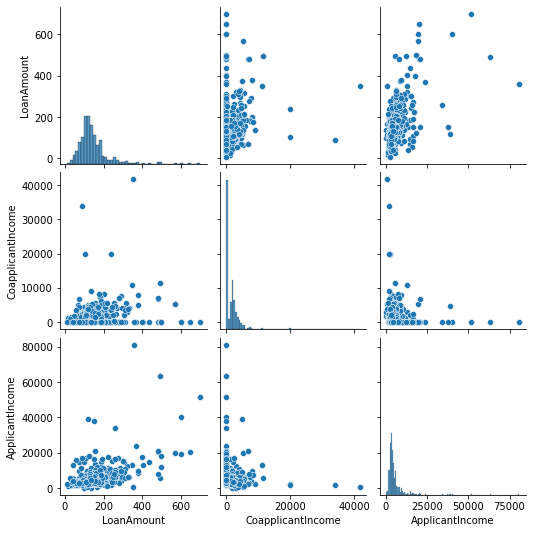

In [22]:
#sns.pairplot(data_train_IF_ENC[['AI','AL','AI2','AI X AL','AL2']])
sns.pairplot(data_train_IF_ENC[['LoanAmount','CoapplicantIncome','ApplicantIncome']])

In [23]:
def log_transformation(num_col):
    return np.log((1+num_col))    

In [24]:
#log_transform_col = ['AI','AL','AI2','AI X AL','AL2','CoapplicantIncome']
log_transform_col = ['LoanAmount','CoapplicantIncome','ApplicantIncome']

In [25]:
for df in [data_train_IF_ENC,data_test_IF_ENC]:
    for col in log_transform_col:
        df[str(col) + 'log'] = log_transformation(df[col])
data_train_IF_ENC.columns.values.tolist()    

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender_Female',
 'Gender_Male',
 'Married_Yes',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'LoanAmountlog',
 'CoapplicantIncomelog',
 'ApplicantIncomelog']

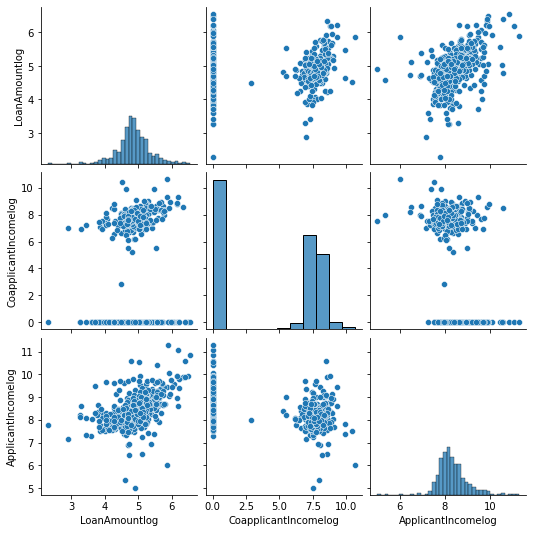

In [26]:
#sns.pairplot(data_train_IF_ENC[['AIlog','ALlog','AI2log','AI X ALlog','AL2log']])
sns.pairplot(data_train_IF_ENC[['LoanAmountlog','CoapplicantIncomelog','ApplicantIncomelog']])

In [27]:
#data_train_IF_ENC_LOG = data_train_IF_ENC.drop(['AI','AL','AI2','AI X AL','AL2','CoapplicantIncome'],axis=1)
data_train_IF_ENC_LOG = data_train_IF_ENC.drop(log_transform_col,axis=1)

In [28]:
#data_test_IF_ENC_LOG = data_test_IF_ENC.drop(['AI','AL','AI2','AI X AL','AL2','CoapplicantIncome'],axis=1)
data_test_IF_ENC_LOG = data_test_IF_ENC.drop(log_transform_col,axis=1)

# Standardize Dataframes


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
mms = MinMaxScaler()
data_train_mms_arr = mms.fit_transform(data_train_IF_ENC_LOG)

In [31]:
data_train_IF_ENC_LOG_MMS = pd.DataFrame(data=data_train_mms_arr,columns=data_train_IF_ENC_LOG.columns)

In [32]:
data_test_mms_arr = mms.fit_transform(data_test_IF_ENC_LOG)

In [33]:
data_test_IF_ENC_LOG_MMS = pd.DataFrame(data=data_test_mms_arr,columns=data_test_IF_ENC_LOG.columns)

In [34]:
#sns.pairplot(data_train_IF_ENC_LOG_MMS[['AIlog','ALlog','AI2log','AI X ALlog','AL2log']])

# Feature Selection usin SlectKBest

In [356]:
from sklearn.feature_selection import chi2,SelectKBest
skb = SelectKBest(score_func=chi2, k = 2)
skb.fit(data_train_IF_ENC_LOG_MMS,data_train_target)


SelectKBest(k=2, score_func=<function chi2 at 0x00000266AF550AF0>)

In [357]:
feature_selection  = [(item , score) for item,score in zip(data_train_IF_ENC_LOG_MMS.columns.values,skb.scores_)]
sorted(feature_selection,key = lambda x : -x[1])[:15]

[('Credit_History', 25.909858844923036),
 ('Property_Area_Semiurban', 6.941870331339304),
 ('Education_Not Graduate', 3.3886667497833027),
 ('Married_Yes', 1.6978141315667465),
 ('Property_Area_Urban', 0.7868553636946538),
 ('CoapplicantIncomelog', 0.7849071319788421),
 ('Gender_Female', 0.1878024728188814),
 ('Gender_Male', 0.0877354780375681),
 ('Dependents', 0.04404234898717403),
 ('LoanAmountlog', 0.02141924771751512),
 ('Loan_Amount_Term', 0.007533075788641762),
 ('Self_Employed_No', 0.006327968807274702),
 ('Self_Employed_Yes', 0.00305666317403033),
 ('ApplicantIncomelog', 0.0010832675075729732)]

In [358]:
select_names_kbest = skb.get_support()
select_names_kbest

array([False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False])

In [359]:
feature_names_kbest = data_train_IF_ENC_LOG_MMS.columns[select_names_kbest]
feature_names_kbest

Index(['Credit_History', 'Property_Area_Semiurban'], dtype='object')

In [360]:
data_train_IF_ENC_LOG_MMS_KBest = data_train_IF_ENC_LOG_MMS[feature_names_kbest]
data_test_IF_ENC_LOG_MMS_KBest = data_test_IF_ENC_LOG_MMS[feature_names_kbest]
data_train_IF_ENC_LOG_MMS_KBest.shape
data_test_IF_ENC_LOG_MMS_KBest.shape

(367, 2)

# Lazy Learner

In [361]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [362]:
X_train,y_train,X_test,y_test= train_test_split(data_train_IF_ENC_LOG_MMS_KBest,data_train_target,test_size=0.1)

In [363]:
clf_ = LazyClassifier()

In [364]:
clf_.fit(X_train,y_train,X_test,y_test)

100%|██████████| 29/29 [00:01<00:00, 15.84it/s]


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 BernoulliNB                        0.84               0.76     0.76      0.83   
 AdaBoostClassifier                 0.84               0.75     0.75      0.82   
 LogisticRegression                 0.84               0.75     0.75      0.82   
 XGBClassifier                      0.84               0.75     0.75      0.82   
 SVC                                0.84               0.75     0.75      0.82   
 SGDClassifier                      0.84               0.75     0.75      0.82   
 RidgeClassifierCV                  0.84               0.75     0.75      0.82   
 RidgeClassifier                    0.84               0.75     0.75      0.82   
 RandomForestClassifier             0.84               0.75     0.75      0.82   
 QuadraticDiscriminantAnalysis      0.84               0.75     0.75      0.82   
 Perceptron     

In [342]:
clf_.classifiers

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LabelPropagation',
  sklearn.semi_supervised._label_propagation.LabelPropagation),
 ('LabelSpreading', sklearn.semi_supervised._label_propagation.LabelSpreading),
 ('LinearDiscriminantAnalysis',
  sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('Linear

# Model Evaluation

In [365]:
from sklearn.ensemble._weight_boosting import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

In [366]:
def get_ensemble_Voting():
    models = list()
    models.append(('ADA',AdaBoostClassifier()))
    #models.append(('KNN',KNeighborsClassifier(n_neighbors=4)))
    #models.append(('BAG',BaggingClassifier()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('GNB',GaussianNB()))
    models.append(('LOG',LogisticRegression()))
    enb_clf = VotingClassifier(estimators= models,voting='soft')
    return enb_clf
    

In [367]:
def get_ensemble_Stacking():
    models = list()
    models.append(('ADA',AdaBoostClassifier()))
   #models.append(('KNN',KNeighborsClassifier()))
   #models.append(('BAG',BaggingClassifier()))
    models.append(('QDA',QuadraticDiscriminantAnalysis()))
    models.append(('GNB',GaussianNB()))
    models.append(('LOG',LogisticRegression()))
    enb_clf = StackingClassifier(estimators= models,final_estimator=LogisticRegression())
    return enb_clf

In [368]:
def get_models():
    models= dict()
    models['ADA'] = AdaBoostClassifier()
    models['KNN'] = KNeighborsClassifier()
    models['BAG']=BaggingClassifier()
    models['QDA'] = QuadraticDiscriminantAnalysis()
    models['GNB'] = GaussianNB()
    models['LOG'] = LogisticRegression()
    models['ENSM_VOT'] = get_ensemble_Voting()
    models['ENSM_STK'] = get_ensemble_Stacking()
    
    return models

In [369]:
def model_eval(model,X,y):
    cv_score = cross_val_score(model,X,y,cv=4,scoring='accuracy')
    return cv_score

Model Name: ADA , Score: 0.8085 , Dev : 0.0184
Model Name: KNN , Score: 0.7497 , Dev : 0.0911
Model Name: BAG , Score: 0.7938 , Dev : 0.0130
Model Name: QDA , Score: 0.8085 , Dev : 0.0184
Model Name: GNB , Score: 0.8085 , Dev : 0.0184
Model Name: LOG , Score: 0.8085 , Dev : 0.0184
Model Name: ENSM_VOT , Score: 0.8085 , Dev : 0.0184
Model Name: ENSM_STK , Score: 0.8085 , Dev : 0.0184


{'whiskers': [<matplotlib.lines.Line2D at 0x266c3c8db50>,
 'caps': [<matplotlib.lines.Line2D at 0x266c3c8dfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x266c3c8d040>,
 'medians': [<matplotlib.lines.Line2D at 0x266c3ca05b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x266c3ca0b50>,
 'means': [<matplotlib.lines.Line2D at 0x266c3ca0880>,
  <matplotlib.lines.Line2D at 0x266c3d1a880>]}

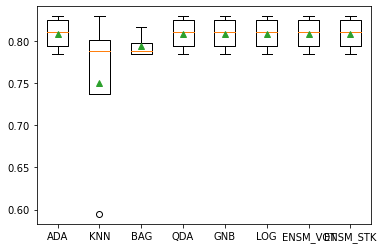

In [370]:
name,score = list(),list()
models = get_models()
for nm,mod in models.items():
    name.append(nm)
    sr = model_eval(mod,data_train_IF_ENC_LOG_MMS_KBest,data_train_target)
    score.append(sr)
    print("Model Name: {0} , Score: {1:.4f} , Dev : {2:.4f}".format(nm,np.mean(sr),np.std(sr)))
plt.boxplot(score,labels=name,showmeans=True)

In [371]:
vot_clf = get_ensemble_Voting()
vot_clf.fit(data_train_IF_ENC_LOG_MMS_KBest,data_train_target)
y_pred_ENSMBL =vot_clf.predict(data_test_IF_ENC_LOG_MMS_KBest)
y_pred_ENSMBL_cat=  [('Y' if item == 1 else 'N' ) for item in y_pred_ENSMBL]
Submission_lr_mod= pd.DataFrame(tuple(zip(data_test_LoanID,y_pred_ENSMBL_cat)),columns = ['Loan_ID','Loan_Status'])
filepath = Path('C:\\Users\\anshu\\Desktop\\JAT\\Loan Predictions\\submission_ENSMBL__IF_ENC_LOG_MMS_KBest.csv') 
Submission_lr_mod.to_csv(filepath,index=False)